## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for plot creating the charts
- [pandas](https://python-graph-gallery.com/pandas/) is used to put the data into a dataframe and custom the table
- `numpy` for data generation

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

Our dataset consists of values on weather such as Freeze or Hail. We store our data in a **pandas dataframe**.

The "rows" column:
- for each value of x in the tuple, it creates a **string like "100 year"**, "50 year", "20 year", and so on.

In [5]:
data = {'Freeze': [ 66386, 174296,  75131, 577908,  32015],
        'Wind': [ 58230, 381139,  78045,  99308, 160454],
        'Flood': [ 89135,  80552, 152558, 497981, 603535],
        'Quake': [ 78415,  81858, 150656, 193263,  69638],
        'Hail': [139361, 331509, 343164, 781380,  52269],
        'rows': ['%d year' % x for x in (100, 50, 20, 10, 5)]}
df = pd.DataFrame(data)

## Create the barplot

The following code creates a [stacked barplot](https://python-graph-gallery.com/barplot/), with a **gradient color** for subgroups in each bar. 

- `index` specifies the **positions** of the bars on the x-axis
- `bar_width` determines the **width** of the bars
- `y_offset` is used to **keep track of the vertical position** of each category's bars on the chart

Then, we loop through the data and creates the stacked bar chart:

- For each row of data, it adds a set of bars to the chart
- Each bar represents a category's loss, and they are **stacked on top of each other**
- **Color of the bar** is defined with our `colors` variabme
- The **heights of the bars** are determined by the values in the data

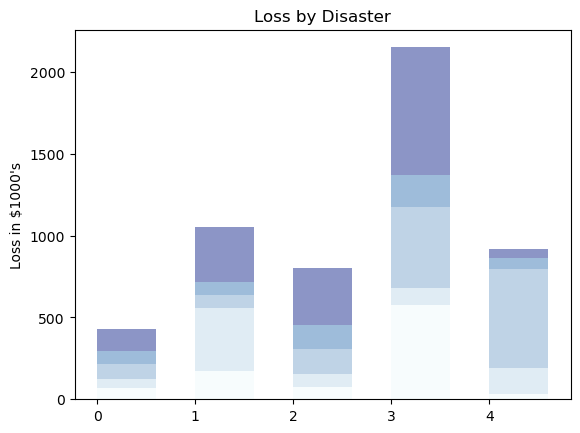

In [6]:
values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(df)))
n_rows = len(df)

index = np.arange(len(df.columns)-1) + 0.3
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(df.columns)-1)

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, df.iloc[:, row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + df.iloc[:, row]

# Add labels and title
plt.ylabel(f"Loss in ${value_increment}'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.title('Loss by Disaster')

# Display the chart
plt.show()

## Add table on the chart

Using the same code as before, we add the following elements:

- It adjusts the layout with `plt.subplots_adjust(left=0.1, bottom=0.1)` to make room for the table at the bottom of the chart
- It **adds a table** at the bottom of the chart using `plt.table()`. This table includes the **text labels**, **row labels** (from the 'rows' column in the DataFrame), and column labels (from the DataFrame's columns)

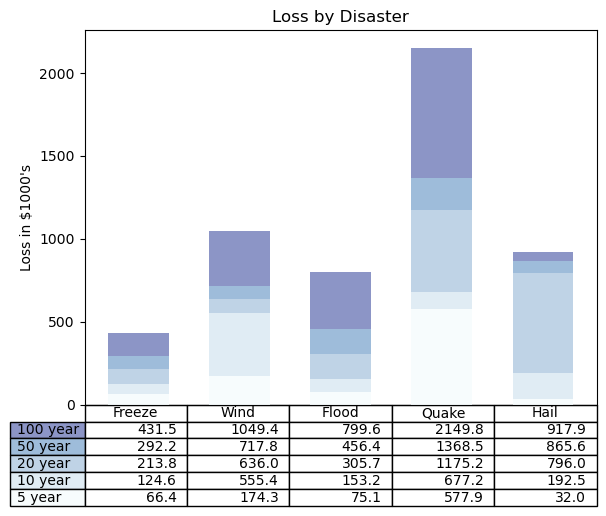

In [7]:
values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(df)))
n_rows = len(df)

index = np.arange(len(df.columns)-1) + 0.3
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(df.columns)-1)

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, df.iloc[:, row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + df.iloc[:, row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=df['rows'],
                      rowColours=colors,
                      colLabels=df.columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.1)

# Add label and title
plt.ylabel(f"Loss in ${value_increment}'s")
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

# Dislay the chart
plt.show()

## Going further

This post explains how to create a bar chart with a table underneath using [matplotlib](https://python-graph-gallery.com/matplotlib/).

For more examples of **how to create or customize** your bar plots, see the [barplot section](https://python-graph-gallery.com/barplot/). You may also be interested in how to [create a grouped barplot](https://python-graph-gallery.com/grouped-barplot/).